## Class conditional Probability density

p(x/$c_i$)=$\frac{1}{2π^\frac{d}{2}|Σ_i|^\frac{1}{2}} exp[-\frac{1}{2}(X-\mu_i)^TΣ^{-1}_i(X-μ_i)]$

In [ ]:
# Get utils.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)



In [ ]:
# Load the data files from 
# https://github.com/allisonhorst/palmerpenguins
# With gratitude to Allison Horst (@allison_horst)

download('https://github.com/allisonhorst/palmerpenguins/raw/master/inst/extdata/penguins_raw.csv')


Downloaded penguins_raw.csv


In [ ]:
import pandas as pd

df = pd.read_csv('penguins_raw.csv')
df.shape


(344, 17)

In [ ]:
def shorten(species):
    return species.split()[0]

df['Species2'] = df['Species'].apply(shorten)


In [ ]:
columns = ['Culmen Length (mm)', 'Culmen Depth (mm)','Flipper Length (mm)','Species2']
df1 = pd.DataFrame(df, columns=columns)
mean_value=df1['Culmen Length (mm)'].mean()
df1['Culmen Length (mm)'].fillna(value=mean_value, inplace=True)
mean_value=df1['Culmen Depth (mm)'].mean()
df1['Culmen Depth (mm)'].fillna(value=mean_value, inplace=True)
mean_value=df1['Flipper Length (mm)'].mean()
df1['Flipper Length (mm)'].fillna(value=mean_value, inplace=True)

df1.head()


,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Species2
0,39.10000,18.70000,181.000000,Adelie
1,39.50000,17.40000,186.000000,Adelie
2,40.30000,18.00000,195.000000,Adelie
3,43.92193,17.15117,200.915205,Adelie
4,36.70000,19.30000,193.000000,Adelie


In [ ]:
dfA=df1[df1.Species2=='Adelie']
dfC=df1[df1.Species2=='Chinstrap']
dfG=df1[df1.Species2=='Gentoo']



## 1.Is actual data normally distributed?

Is culmenDepth of Adelie group normally distributed?

observe from histogram and Answer the question


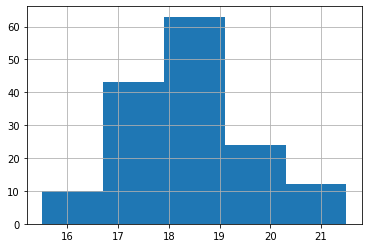

In [ ]:
hist = dfA['Culmen Depth (mm)'].hist(bins=5)


## 2. Estimate normal distribution for Culmen Depth using scipy.stats



While real data may not often be exactly 
normal, it  useful to approximate normal distribution for analysis for univariate and multivariate Analysis.

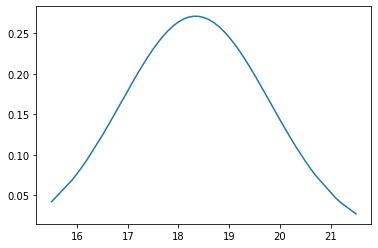

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
x=dfA.sort_values(by=['Culmen Depth (mm)'])
x=x['Culmen Depth (mm)']

mu=np.mean(x)
sigma=np.var(x)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()


## 3.define the discriminant function used for Classification

$P_i(x)=ΠP(x|c_i)P(C_i)$


### General formula (taking log)

$g_i(x)=logP(x|c_i)+logP(C_i)$

### Formula for each Class

$g_{Adelie}(x)=logP(x|c_{Adelie})+logP(C_{Adelie})$

$g_{Chinstrap}(x)=logP(x|c_{Chinstrap})+logP(C_{Chinstrap})$

$g_{Gentoo}(x)=logP(x|c_{Gentoo})+logP(C_{Gentoo})$


# 4.Substitute normal function in discriminant  Function



$g_i(x)=logP(x|c_i)+logP(C_i)$ .....(1)



 p(x/$c_i$)=$\frac{1}{2π^\frac{d}{2}|Σ_i|^\frac{1}{2}} exp[-\frac{1}{2}(X-\mu_i)^TΣ^{-1}_i(X-μ_i)]$ ...(2)

substitute (2) in equation (1)above

$g_i(x)=-\frac{d}{2}log2Π-\frac{1}{2}log|Σ_i|-\frac{1}{2}(X-\mu_i)^TΣ^{-1}_i(X-\mu_i)+logP(C_i)$   ....(3)

### Formula for each Class

$g_{Adelie}(x)=-\frac{d}{2}log2Π-\frac{1}{2}log|Σ_{Adelie}|-\frac{1}{2}(X_{Adelie}-\mu_{Adelie})^TΣ^{-1}_{Adelie}(X_{Adelie}-\mu_{Adelie})+logP(C_{Adelie})$


$g_{Chinstrap}(x)=-\frac{d}{2}log2Π-\frac{1}{2}log|Σ_{Chinstrap}|-\frac{1}{2}(X_{Chinstrap}-\mu_{Chinstrap})^TΣ^{-1}_{Chinstrap}(X_{Chinstrap}-\mu_{Chinstrap})+logP(C_{Chinstrap})$


$g_{Gentoo}(x)=-\frac{d}{2}log2Π-\frac{1}{2}log|Σ_{Gentoo}|-\frac{1}{2}(X_{Gentoo}-\mu_{Gentoo})^TΣ^{-1}_{Gentoo}(X_{Gentoo}-\mu_{Gentoo})+logP(C_{Gentoo})$



## 5.Can equation ... (3) be used to find densities of K classes (three penguins here)? _______________

This is the reason equation ...(3) is called discriminant function

## 6.Find mean,covariance and priors for sample with K classes

$P(C_i)=\frac{Σ_tr^t_i}{N}$

$m_i=\frac{Σ_tr^t_ix^t_i}{Σ_tr^t_i}$

$S_i=\frac{Σ_tr^t_i(x^t_i-m_i)(x^t_i-m_i)^T}{Σ_tr^t_i}$

Here i varies from 1 to K

Here t varies from 1 to N

$r_i =1 $ for i class

$x_t$ varies from 1 to N


## 7.Calculate Prior,mean,variance and priors for penguin data for three classes

### For Adelie class calculations replace strings Adelie =1 ,Chinstrap =0 and Getoo=0

In [ ]:
mymap = {'Adelie':1, 'Chinstrap':0, 'Gentoo':0}
dfAs=df1
dfAs=dfAs.applymap(lambda s: mymap.get(s) if s in mymap else s)
dfAs.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Species2
0,39.10000,18.70000,181.000000,1
1,39.50000,17.40000,186.000000,1
2,40.30000,18.00000,195.000000,1
3,43.92193,17.15117,200.915205,1
4,36.70000,19.30000,193.000000,1


## 8.Math Calculation of Prior,Mean,CoVariance for Adelie class

In [ ]:
#C=dfAs[Species2]==1
C = dfAs[(dfAs['Species2'] == 1)]
print(type(C))
count=C['Culmen Length (mm)'].count()
print(count)
Prior_Adelie=dfAs["Species2"].mean()
print("\nPrior_Adelie\n",Prior_Adelie)
dfAs['Cul_len']=dfAs["Culmen Length (mm)"]*dfAs["Species2"]
Mean_Adelie_L=dfAs['Cul_len'].sum()/count
print("\nMean_Adelie_Length")
print(Mean_Adelie_L)

dfAs['Cul_dep']=dfAs["Culmen Depth (mm)"]*dfAs["Species2"]
Mean_Adelie_D=dfAs['Cul_dep'].sum()/count
print("\nMean_Adelie_Depth")
print(Mean_Adelie_D)

dfAs['Flip_len']=dfAs["Flipper Length (mm)"]*dfAs["Species2"]
Mean_Adelie_F=dfAs['Flip_len'].sum()/count
print("\nMean_Adelie_Flipper")
print(Mean_Adelie_F)

dfAs['cul_len_dev']=dfAs["Species2"]*(dfAs['Culmen Length (mm)']-Mean_Adelie_L)
dfAs['cul_len_sd']=(dfAs["cul_len_dev"]**2)
Var_Adelie_Len=((dfAs['cul_len_sd'].sum()))/count
print("\nVar_Adelie_Len")
print(Var_Adelie_Len)

dfAs['cul_dep_dev']=dfAs['Culmen Depth (mm)']-Mean_Adelie_D
dfAs['cul_len_dep_sd']=dfAs["Species2"]*(dfAs["cul_len_dev"]*dfAs["cul_dep_dev"])
CoVar_Adelie_Len_Dep=dfAs['cul_len_dep_sd'].sum()/count
print("\nCoVar_Adelie_Length_Depth")
print(CoVar_Adelie_Len_Dep)

dfAs['cul_flip_dev']=dfAs["Flipper Length (mm)"]-Mean_Adelie_F
dfAs['cul_len_flip_sd']=dfAs["Species2"]*(dfAs["cul_len_dev"]*dfAs["cul_flip_dev"])
CoVar_AdelieLen_Flip=dfAs['cul_len_flip_sd'].sum()/count
print("\nCoVar_Adelie-Length_Flipper")
print(CoVar_AdelieLen_Flip)

<class 'pandas.core.frame.DataFrame'>
152

Prior_Adelie
 0.4418604651162791

Mean_Adelie_Length
38.82514427516159

Mean_Adelie_Depth
18.338494536780548

Mean_Adelie_Flipper
190.02575792551556

Var_Adelie_Len
7.172421483372202

CoVar_Adelie_Length_Depth
1.2118332095049236

CoVar_Adelie-Length_Flipper
5.967160969733888


In [ ]:
dfAs

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Species2,Cul_len,Cul_dep,Flip_len,cul_len_dev,cul_len_sd,cul_dep_dev,cul_len_dep_sd,cul_flip_dev,cul_len_flip_sd
0,39.10000,18.70000,181.000000,1,39.10000,18.70000,181.000000,0.274856,0.075546,0.361505,0.099362,-9.025758,-2.480781
1,39.50000,17.40000,186.000000,1,39.50000,17.40000,186.000000,0.674856,0.455430,-0.938495,-0.633348,-4.025758,-2.716806
2,40.30000,18.00000,195.000000,1,40.30000,18.00000,195.000000,1.474856,2.175199,-0.338495,-0.499231,4.974242,7.336289
3,43.92193,17.15117,200.915205,1,43.92193,17.15117,200.915205,5.096786,25.977223,-1.187325,-6.051541,10.889447,55.501175
4,36.70000,19.30000,193.000000,1,36.70000,19.30000,193.000000,-2.125144,4.516238,0.961505,-2.043338,2.974242,-6.320694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.80000,19.80000,207.000000,0,0.00000,0.00000,0.000000,0.000000,0.000000,1.461505,0.000000,16.974242,0.000000
340,43.50000,18.10000,202.000000,0,0.00000,0.00000,0.000000,0.000000,0.000000,-0.238495,-0.000000,11.974242,0.000000
341,49.60000,18.20000,193.000000,0,0.00000,0.00000,0.000000,0.000000,0.000000,-0.138495,-0.000000,2.974242,0.000000
342,50.80000,19.00000,210.000000,0,0.00000,0.00000,0.000000,0.000000,0.000000,0.661505,0.000000,19.974242,0.000000


## 9. Calculate Mean Matrix  and Covariance Matrix for Adelie three columns using np.mean and np.cov

## 10.Substitute the above mean ,variance and priors in Discriminant Function 

$g_i(x)=-\frac{d}{2}log2Π-\frac{1}{2}log|Σ_i|-\frac{1}{2}(X-\mu_i)^TΣ^{-1}_i(X-\mu_i)+logP(C_i)$   

$g_i(x)=-\frac{d}{2}log2Π-\frac{1}{2}log|S_i|-\frac{1}{2}(x-m_i)^TS^{-1}_i(x-m_i)+logP(C_i)$   

remove constant term

$g_i(x)=-\frac{1}{2}log|S_i|-\frac{1}{2}(x-m_i)^TS^{-1}_i(x-m_i)+logP(C_i)$   

$g_i(x)=-\frac{1}{2}log|S_i|-\frac{1}{2}(x^TS^{-1}_ix-2x^TS^{-1}_im_i+{m_i}^TS^{-1}_im_i)+logP(C_i)$ 

The above equation is called quadratic discriminant 


## 11.QD=quadratic discriminant Equation

$g_i(x)=-\frac{1}{2}log|S_i|-\frac{1}{2}(x^TS^{-1}_ix-2x^TS^{-1}_im_i+{m_i}^TS^{-1}_im_i)+logP(C_i)$ 

It can be written as

$g_i(x)=x^TW_ix+w^T_ix+w_{i0}$ 

Different parts of Quadratic discriminant are 

$W_i=-\frac{1}{2}S^{-1}_i$ 

$w^T_i=S^{-1}_im_i$ 

$w_{i0}=-\frac{1}{2}log|S_i|-\frac{1}{2}{m_i}^TS^{-1}m_i+logP(C_i)$ 

## The decision boudary(line separating contours ,3D distribution) will be curved

## Calculate Decision boundary

discriminant for class1:

$g_1(x)=-\frac{1}{2}log|S_1|-\frac{1}{2}(x^TS^{-1}_1x-2x^TS^{-1}_1m_1+{m_1}^TS^{-1}_1m_1)+logP(C_1)$ 

discriminant for class2:

$g_2(x)=-\frac{1}{2}log|S_2|-\frac{1}{2}(x^TS^{-1}_2x-2x^TS^{-1}_2m_2+{m_2}^TS^{-1}_2m_2)+logP(C_2)$ 

at decision boundary both discriminants are equal

$g_1(x)=g_2(x)$

so we get:


$-\frac{1}{2}log|S_1|-\frac{1}{2}(x^TS^{-1}_1x-2x^TS^{-1}_1m_1+{m_1}^TS^{-1}_1m_1)+logP(C_1)=-\frac{1}{2}log|S_2|-\frac{1}{2}(x^TS^{-1}_2x-2x^TS^{-1}_2m_2+{m_2}^TS^{-1}_2m_2)+logP(C_2)$ 

therefore:

$\frac{1}{2}log|S_2|+\frac{1}{2}(x^TS^{-1}_2x-2x^TS^{-1}_2m_2+{m_2}^TS^{-1}_2m_2)-logP(C_2)-\frac{1}{2}log|S_1|-\frac{1}{2}(x^TS^{-1}_1x-2x^TS^{-1}_1m_1+{m_1}^TS^{-1}_1m_1)+logP(C_1)=0$ 

therefore:

$+\frac{1}{2}(x^T(S^{-1}_2-S^{-1}_1)x-2x^T(S^{-1}_2m_2-S^{-1}_1m_1)+({m_2}^Tm_2S^{-1}_2-{m_1}^Tm_1S^{-1}_1)+logP(C_1)-logP(C_2)+\frac{1}{2}log|S_2|-\frac{1}{2}log|S_1|=0$ 

This is in the form of:
$ax^2+bx+c=0$

where 

$a=\frac{1}{2}(S^{-1}_2-S^{-1}_1)$

$b=-2(S^{-1}_2m_2-S^{-1}_1m_1)$

$c=({m_2}^Tm_2S^{-1}_2-{m_1}^Tm_1S^{-1}_1)+logP(C_1/C_2)+\frac{1}{2}log(|S_2|/|S_1|)$

## Q.Calculate $W_{Adelie}$,$w^T_Adelie$ and $w_{Adelieo}$ from mean and covariance matrix  calculated above

## 12.Find number of Estimates for Quadratic discriminant function

x has d variables
k=number of classes

Parameters to be estimated:

number of means to be estimated=_____________

number of elements for covariances=______________

## 13.$S_i$=singular matric effect on Quadratic Discriminant function

when samples N are minimum,d is very large

we get

$|S_i|=0$

so  $S^{-1}_i is=undefined$

### what will be  quadratic discriminant in such case?______________

### Solution for such cases  =reduce dimensions d by different ways called dimensionality reduction(next chapter)


## 14.QuadraticDiscriminant(QD)  ADELIE Contourplot

(152, 152, 2)
MEAN
 Culmen Length (mm)    38.825144
Culmen Depth (mm)     18.338495
dtype: float64
COVARIANCE
 [[7.21992096 1.21985859]
 [1.21985859 1.47983161]]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


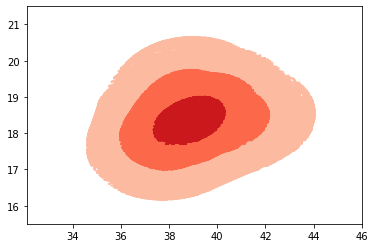

In [ ]:

import numpy as np
from scipy.stats import multivariate_normal
df2=df1[df1.Species2=="Adelie"]
mean_value=df2['Culmen Length (mm)'].mean()
df2['Culmen Length (mm)'].fillna(value=mean_value, inplace=True)
mean_value=df2['Culmen Depth (mm)'].mean()

df2['Culmen Depth (mm)'].fillna(value=mean_value, inplace=True)
mean_value=df2['Flipper Length (mm)'].mean()

df2['Flipper Length (mm)'].fillna(value=mean_value, inplace=True)

X=df2['Culmen Length (mm)']
Y=df2['Culmen Depth (mm)']
Z=df2[['Culmen Length (mm)','Culmen Depth (mm)']]




mu=np.mean(Z,axis=0)
cov=np.cov(Z,rowvar=0)
X, Y = np.meshgrid(X,Y)

pos = np.empty(X.shape+(2,))
print(pos.shape)
pos[:,:,0]=X

pos[:,:,1]=Y

rv = multivariate_normal(mu,cov)
p=rv.pdf(pos)
print("MEAN\n",mu)
print("COVARIANCE\n",cov)
fig, ax = plt.subplots()
#ax.contour(X, Y, p,colors='black') 
contours=ax.contour(X, Y, p, levels=3, cmap='Reds')
#plt.clabel(contours, inline=True, fontsize=8)


plt.show()

## 15.QD Chinstrap Contourplot

(68, 68, 2)
MEAN
 Culmen Length (mm)    48.833824
Culmen Depth (mm)     18.420588
dtype: float64
COVARIANCE
 [[11.15062994  2.4778007 ]
 [ 2.4778007   1.28912204]]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


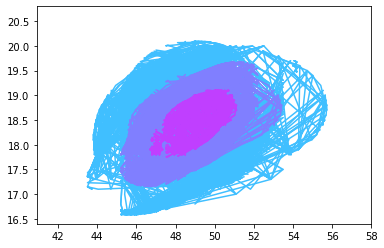

In [ ]:
df2=df1[df1.Species2=="Chinstrap"]
mean_value=df2['Culmen Length (mm)'].mean()
df2['Culmen Length (mm)'].fillna(value=mean_value, inplace=True)
mean_value=df2['Culmen Depth (mm)'].mean()

df2['Culmen Depth (mm)'].fillna(value=mean_value, inplace=True)
mean_value=df2['Flipper Length (mm)'].mean()

df2['Flipper Length (mm)'].fillna(value=mean_value, inplace=True)

X=df2['Culmen Length (mm)']
Y=df2['Culmen Depth (mm)']
Z=df2[['Culmen Length (mm)','Culmen Depth (mm)']]




mu=np.mean(Z,axis=0)
cov=np.cov(Z,rowvar=0)
X, Y = np.meshgrid(X,Y)

pos = np.empty(X.shape+(2,))
print(pos.shape)
pos[:,:,0]=X

pos[:,:,1]=Y

rv = multivariate_normal(mu,cov)
p=rv.pdf(pos)
print("MEAN\n",mu)
print("COVARIANCE\n",cov)

plt.contour(X,Y,p,levels=3,cmap='cool')

## 16.QD contourplot for Adelie,Chinstrap and Gentoo classes


Prior Adelie 
 0.4418604651162791

Mean Adelie 
 Culmen Length (mm)    38.825144
Culmen Depth (mm)     18.338495
dtype: float64

Covariance Adelie 
 [[7.21992096 1.21985859]
 [1.21985859 1.47983161]]

Prior Chinstrap 
 0.19767441860465115

Mean Chinstrap 
 Culmen Length (mm)    48.833824
Culmen Depth (mm)     18.420588
dtype: float64

Covariance Chinstrap 
 [[11.15062994  2.4778007 ]
 [ 2.4778007   1.28912204]]

Prior Gentoo 
 0.36046511627906974

Mean Gentoo 
 Culmen Length (mm)    47.475983
Culmen Depth (mm)     14.999606
dtype: float64

Covariance Gentoo 
 [[9.52415498 1.86708774]
 [1.86708774 0.9929066 ]]
g1 (152, 152)
g2 (68, 68)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


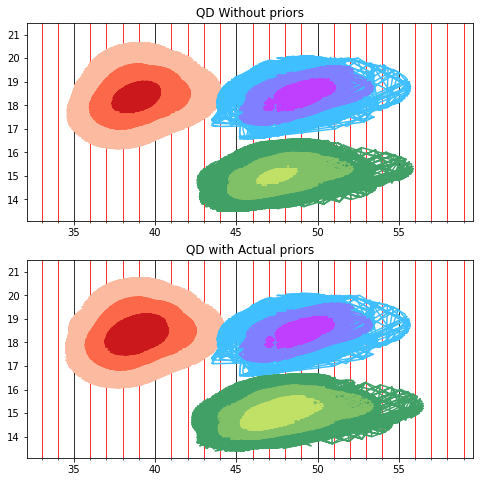

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.ticker as tck

def plotcontour(category,df1):
    Total=df1['Species2'].count()

    df2=df1[df1.Species2==category]
    count=df2['Species2'].count()
    prior=count/Total
    print("\nPrior",category,"\n",prior)
    mean_value=df2['Culmen Length (mm)'].mean()
    df2['Culmen Length (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Culmen Depth (mm)'].mean()

    df2['Culmen Depth (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Flipper Length (mm)'].mean()

    df2['Flipper Length (mm)'].fillna(value=mean_value, inplace=True)

    X=df2['Culmen Length (mm)']
    Y=df2['Culmen Depth (mm)']
    Z=df2[['Culmen Length (mm)','Culmen Depth (mm)']]
    mu=np.mean(Z,axis=0)
    cov=np.cov(Z,rowvar=0)
    print("\nMean",category,"\n",mu)
    print("\nCovariance",category,"\n",cov)

    X, Y = np.meshgrid(X,Y)

    pos = np.empty(X.shape+(2,))
    #print(pos.shape)
    pos[:,:,0]=X

    pos[:,:,1]=Y

    rv = multivariate_normal(mu,cov)
    p=rv.pdf(pos)
    # Decision Boundary
    g = np.log(p) 

    #print("MEAN\n",mu)
    #print("COVARIANCE\n",cov)
    #fig, ax = plt.subplots()
    #ax.contour(X, Y, p,colors='black') 
    #contours=ax.contour(X, Y, p, levels=3, cmap=cm)
    #plt.clabel(contours, inline=True, fontsize=8)
    #plt.show()
    return X,Y,p,prior,g;
# call function
X1,Y1,p1,pr1,g1=plotcontour("Adelie",df1)
X2,Y2,p2,pr2,g2=plotcontour("Chinstrap",df1)
X3,Y3,p3,pr3,g3=plotcontour("Gentoo",df1)
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(211)
ax1.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax1.grid(axis = 'x',which='major',color='black')
ax1.grid(axis = 'x',which='minor',color="red")

contours=ax1.contour(X1, Y1, p1, levels=3, cmap="Reds")
contours=ax1.contour(X2, Y2, p2, levels=3, cmap="cool")
#ax1.contour(X1, Y1, g1-g2, [0])
print("g1",g1.shape)
print("g2",g2.shape)
contours=ax1.contour(X3, Y3, p3, levels=3, cmap="summer")
ax1.set_title("QD Without priors")
ax2 = fig.add_subplot(212)
ax2.xaxis.set_minor_locator(tck.AutoMinorLocator())

contours=ax2.contour(X1, Y1, (p1*pr1), levels=3, cmap="Reds")
contours=ax2.contour(X2, Y2, (p2*pr2), levels=3, cmap="cool")
contours=ax2.contour(X3, Y3, (p3*pr3), levels=3, cmap="summer")
ax2.set_title("QD with Actual priors")
ax2.grid(axis = 'x',which='major',color='black')
ax2.grid(axis = 'x',which='minor',color="red")
# Decision Boundary

#plt.contour(x, y, g, [0])

plt.show()

## In the QD contours above Comment on the decision boundaries  between classes with and without priors

## 17.QD 3D normal plot for Adelie,Chinstrap and Gentoo classes


Prior Adelie 
 0.4418604651162791

Mean Adelie 
 Culmen Length (mm)    38.825144
Culmen Depth (mm)     18.338495
dtype: float64

Covariance Adelie 
 [[7.21992096 1.21985859]
 [1.21985859 1.47983161]]

Prior Chinstrap 
 0.19767441860465115

Mean Chinstrap 
 Culmen Length (mm)    48.833824
Culmen Depth (mm)     18.420588
dtype: float64

Covariance Chinstrap 
 [[11.15062994  2.4778007 ]
 [ 2.4778007   1.28912204]]

Prior Gentoo 
 0.36046511627906974

Mean Gentoo 
 Culmen Length (mm)    47.475983
Culmen Depth (mm)     14.999606
dtype: float64

Covariance Gentoo 
 [[9.52415498 1.86708774]
 [1.86708774 0.9929066 ]]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


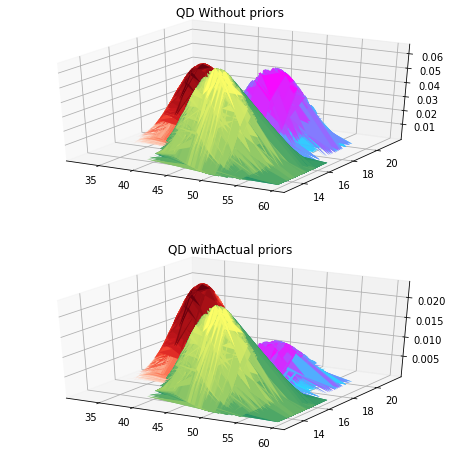

In [ ]:

import numpy as np
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

def plotcontour(category,df1):
    Total=df1['Species2'].count()

    df2=df1[df1.Species2==category]
    count=df2['Species2'].count()
    prior=count/Total
    print("\nPrior",category,"\n",prior)
    mean_value=df2['Culmen Length (mm)'].mean()
    df2['Culmen Length (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Culmen Depth (mm)'].mean()

    df2['Culmen Depth (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Flipper Length (mm)'].mean()

    df2['Flipper Length (mm)'].fillna(value=mean_value, inplace=True)

    X=df2['Culmen Length (mm)']
    Y=df2['Culmen Depth (mm)']
    Z=df2[['Culmen Length (mm)','Culmen Depth (mm)']]
    mu=np.mean(Z,axis=0)
    cov=np.cov(Z,rowvar=0)
    print("\nMean",category,"\n",mu)
    print("\nCovariance",category,"\n",cov)

    X, Y = np.meshgrid(X,Y)

    pos = np.empty(X.shape+(2,))
    #print(pos.shape)
    pos[:,:,0]=X

    pos[:,:,1]=Y

    rv = multivariate_normal(mu,cov)
    p=rv.pdf(pos)
    #print("MEAN\n",mu)
    #print("COVARIANCE\n",cov)
    #fig, ax = plt.subplots()
    #ax.contour(X, Y, p,colors='black') 
    #contours=ax.contour(X, Y, p, levels=3, cmap=cm)
    #plt.clabel(contours, inline=True, fontsize=8)
    #plt.show()
    return X,Y,p,prior;
# call function
X1,Y1,p1,pr1=plotcontour("Adelie",df1)
X2,Y2,p2,pr2=plotcontour("Chinstrap",df1)
X3,Y3,p3,pr3=plotcontour("Gentoo",df1)
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(211, projection='3d')
ax1.set_title("QD Without priors")

pdf1=ax1.plot_surface(X1, Y1, p1,cmap="Reds")
pdf2=ax1.plot_surface(X2, Y2, p2,cmap="cool")
pdf3=ax1.plot_surface(X3, Y3, p3,cmap="summer")
ax2 = fig.add_subplot(212, projection='3d')
ax2.set_title("QD withActual priors")

pdf4=ax2.plot_surface(X1, Y1, (p1*pr1),cmap="Reds")
pdf5=ax2.plot_surface(X2, Y2, (p2*pr2),cmap="cool")
pdf6=ax2.plot_surface(X3, Y3, (p3*pr3),cmap="summer")

plt.show()

## 18.what is the effect of priors on QD equation,contours and 3D distribution?

1.if priors are equal which $g(x_i)$ will be selected smaller or bigger?

2.if priors are not equal which $g(x_i)$ will be selected smaller or bigger?

(Hint:use QD equation and answer questions)


## 19.Quadratic Discriminant  Equation to Linear Discriminant equation Conversion



$g_i(x)=-\frac{1}{2}log|S_i|-\frac{1}{2}(x^TS^{-1}_ix-2x^TS^{-1}_im_i+{m_i}^TS^{-1}_im_i)+logP(C_i)$ 

Let all calsses have same covariance matrix

$S=ΣP(C_i)S_i$

$g_i(x)=-\frac{1}{2}log|S|-\frac{1}{2}(x^TS^{-1}x-2x^TS^{-1}m_i+{m_i}^TS^{-1}m_i)+logP(C_i)$ 

since first two terms are common for all classes we can write as follows

$g_i(x)=x^TS^{-1}m_i-\frac{1}{2}{m_i}^TS^{-1}m_i+logP(C_i)$ 

here $g_i(x)$ is in the form of linear equation

$g_i(x)=w^T_ix+w_{i0}$ 

$w_i=S^{-1}m_i$ 

$w_{i0}=-\frac{1}{2}{m_i}^TS^{-1}m_i+logP(C_i)$ 

## The decision boundary(line separating contours or 3d distribution) will be linear


## 20.Find number of Estimates for Linear discriminant function

x has d variables
k=number of classes

Parameters to be estimated:

number of means to be estimated=_____________

number of elements for covariances=______________

## 21.calculate $S=ΣP(C_i)S_i$ fot LD analysis

In [ ]:
def get_cov_pr(category,df1):
    Total=df1['Species2'].count()

    df2=df1[df1.Species2==category]
    count=df2['Species2'].count()
    prior=count/Total
    print("\nPrior",category,"\n",prior)
    mean_value=df2['Culmen Length (mm)'].mean()
    df2['Culmen Length (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Culmen Depth (mm)'].mean()

    df2['Culmen Depth (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Flipper Length (mm)'].mean()

    df2['Flipper Length (mm)'].fillna(value=mean_value, inplace=True)

    X=df2['Culmen Length (mm)']
    Y=df2['Culmen Depth (mm)']
    Z=df2[['Culmen Length (mm)','Culmen Depth (mm)']]
    mu=np.mean(Z,axis=0)
    cov=np.cov(Z,rowvar=0)
    #print("\nMean",category,"\n",mu)
    print("\nCovariance",category,"\n",cov)

    # X, Y = np.meshgrid(X,Y)

    # pos = np.empty(X.shape+(2,))
    # #print(pos.shape)
    # pos[:,:,0]=X

    # pos[:,:,1]=Y

    # rv = multivariate_normal(mu,cov)
    # p=rv.pdf(pos)
    
    return cov,prior;
cov1,pr1=get_cov_pr("Adelie",df1)
cov2,pr2=get_cov_pr("Chinstrap",df1)
cov3,pr3=get_cov_pr("Gentoo",df1)
s=(cov1*pr1)+(cov1*pr1)+(cov1*pr1)
print("\ncommon_Covariance\n",s)


Prior Adelie 
 0.4418604651162791

Covariance Adelie 
 [[7.21992096 1.21985859]
 [1.21985859 1.47983161]]

Prior Chinstrap 
 0.19767441860465115

Covariance Chinstrap 
 [[11.15062994  2.4778007 ]
 [ 2.4778007   1.28912204]]

Prior Gentoo 
 0.36046511627906974

Covariance Gentoo 
 [[9.52415498 1.86708774]
 [1.86708774 0.9929066 ]]

common_Covariance
 [[9.5705929  1.61702186]
 [1.61702186 1.96163725]]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


## 22.Draw linear discriminant contours for equal covariance


Prior Adelie 
 0.4418604651162791

Mean Adelie 
 Culmen Length (mm)    38.825144
Culmen Depth (mm)     18.338495
dtype: float64

Covariance Adelie 
 [[7.21992096 1.21985859]
 [1.21985859 1.47983161]]

Prior Chinstrap 
 0.19767441860465115

Mean Chinstrap 
 Culmen Length (mm)    48.833824
Culmen Depth (mm)     18.420588
dtype: float64

Covariance Chinstrap 
 [[11.15062994  2.4778007 ]
 [ 2.4778007   1.28912204]]

Prior Gentoo 
 0.36046511627906974

Mean Gentoo 
 Culmen Length (mm)    47.475983
Culmen Depth (mm)     14.999606
dtype: float64

Covariance Gentoo 
 [[9.52415498 1.86708774]
 [1.86708774 0.9929066 ]]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


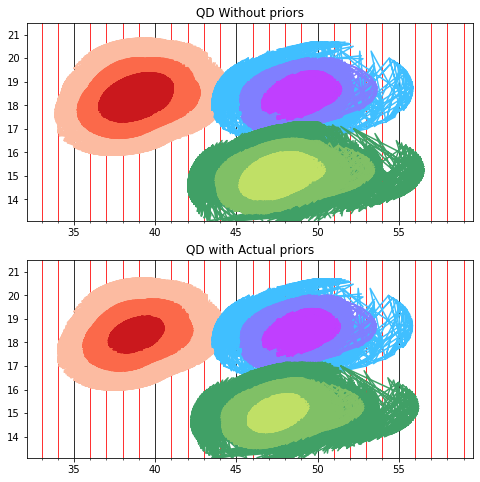

In [ ]:
def Cov_same(category,df1,s):
    Total=df1['Species2'].count()

    df2=df1[df1.Species2==category]
    count=df2['Species2'].count()
    prior=count/Total
    print("\nPrior",category,"\n",prior)
    mean_value=df2['Culmen Length (mm)'].mean()
    df2['Culmen Length (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Culmen Depth (mm)'].mean()

    df2['Culmen Depth (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Flipper Length (mm)'].mean()

    df2['Flipper Length (mm)'].fillna(value=mean_value, inplace=True)

    X=df2['Culmen Length (mm)']
    Y=df2['Culmen Depth (mm)']
    Z=df2[['Culmen Length (mm)','Culmen Depth (mm)']]
    mu=np.mean(Z,axis=0)
    cov=np.cov(Z,rowvar=0)
    print("\nMean",category,"\n",mu)
    print("\nCovariance",category,"\n",cov)

    X, Y = np.meshgrid(X,Y)

    pos = np.empty(X.shape+(2,))
    #print(pos.shape)
    pos[:,:,0]=X

    pos[:,:,1]=Y

    rv = multivariate_normal(mu,s)
    p=rv.pdf(pos)
    # Decision Boundary
    #g = np.log(p) 

    #print("MEAN\n",mu)
    #print("COVARIANCE\n",cov)
    #fig, ax = plt.subplots()
    #ax.contour(X, Y, p,colors='black') 
    #contours=ax.contour(X, Y, p, levels=3, cmap=cm)
    #plt.clabel(contours, inline=True, fontsize=8)
    #plt.show()
    return X,Y,p,prior;
# call function
X1,Y1,p1,pr1=Cov_same("Adelie",df1,s)
X2,Y2,p2,pr2=Cov_same("Chinstrap",df1,s)
X3,Y3,p3,pr3=Cov_same("Gentoo",df1,s)
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(211)
ax1.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax1.grid(axis = 'x',which='major',color='black')
ax1.grid(axis = 'x',which='minor',color="red")

contours=ax1.contour(X1, Y1, p1, levels=3, cmap="Reds")
contours=ax1.contour(X2, Y2, p2, levels=3, cmap="cool")
#ax1.contour(X1, Y1, g1-g2, [0])

contours=ax1.contour(X3, Y3, p3, levels=3, cmap="summer")
ax1.set_title("QD Without priors")
ax2 = fig.add_subplot(212)
ax2.xaxis.set_minor_locator(tck.AutoMinorLocator())

contours=ax2.contour(X1, Y1, (p1*pr1), levels=3, cmap="Reds")
contours=ax2.contour(X2, Y2, (p2*pr2), levels=3, cmap="cool")
contours=ax2.contour(X3, Y3, (p3*pr3), levels=3, cmap="summer")
ax2.set_title("QD with Actual priors")
ax2.grid(axis = 'x',which='major',color='black')
ax2.grid(axis = 'x',which='minor',color="red")
# Decision Boundary

#plt.contour(x, y, g, [0])

plt.show()

## 23.can you draw Linear decision boundary between above plots

## 24.Draw Lineardiscriminant 3d plots for equal covariance


Prior Adelie 
 0.4418604651162791

Mean Adelie 
 Culmen Length (mm)    38.825144
Culmen Depth (mm)     18.338495
dtype: float64

Covariance Adelie 
 [[7.21992096 1.21985859]
 [1.21985859 1.47983161]]

Prior Chinstrap 
 0.19767441860465115

Mean Chinstrap 
 Culmen Length (mm)    48.833824
Culmen Depth (mm)     18.420588
dtype: float64

Covariance Chinstrap 
 [[11.15062994  2.4778007 ]
 [ 2.4778007   1.28912204]]

Prior Gentoo 
 0.36046511627906974

Mean Gentoo 
 Culmen Length (mm)    47.475983
Culmen Depth (mm)     14.999606
dtype: float64

Covariance Gentoo 
 [[9.52415498 1.86708774]
 [1.86708774 0.9929066 ]]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


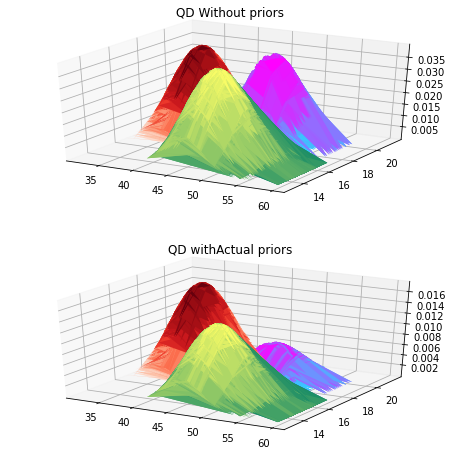

In [ ]:
def Cov_same(category,df1,s):
    Total=df1['Species2'].count()

    df2=df1[df1.Species2==category]
    count=df2['Species2'].count()
    prior=count/Total
    print("\nPrior",category,"\n",prior)
    mean_value=df2['Culmen Length (mm)'].mean()
    df2['Culmen Length (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Culmen Depth (mm)'].mean()

    df2['Culmen Depth (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Flipper Length (mm)'].mean()

    df2['Flipper Length (mm)'].fillna(value=mean_value, inplace=True)

    X=df2['Culmen Length (mm)']
    Y=df2['Culmen Depth (mm)']
    Z=df2[['Culmen Length (mm)','Culmen Depth (mm)']]
    mu=np.mean(Z,axis=0)
    cov=np.cov(Z,rowvar=0)
    print("\nMean",category,"\n",mu)
    print("\nCovariance",category,"\n",cov)

    X, Y = np.meshgrid(X,Y)

    pos = np.empty(X.shape+(2,))
    #print(pos.shape)
    pos[:,:,0]=X

    pos[:,:,1]=Y

    rv = multivariate_normal(mu,s)
    p=rv.pdf(pos)
    # Decision Boundary
    #g = np.log(p) 

    #print("MEAN\n",mu)
    #print("COVARIANCE\n",cov)
    #fig, ax = plt.subplots()
    #ax.contour(X, Y, p,colors='black') 
    #contours=ax.contour(X, Y, p, levels=3, cmap=cm)
    #plt.clabel(contours, inline=True, fontsize=8)
    #plt.show()
    return X,Y,p,prior;
# call function
X1,Y1,p1,pr1=Cov_same("Adelie",df1,s)
X2,Y2,p2,pr2=Cov_same("Chinstrap",df1,s)
X3,Y3,p3,pr3=Cov_same("Gentoo",df1,s)
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(211, projection='3d')
ax1.set_title("QD Without priors")

pdf1=ax1.plot_surface(X1, Y1, p1,cmap="Reds")
pdf2=ax1.plot_surface(X2, Y2, p2,cmap="cool")
pdf3=ax1.plot_surface(X3, Y3, p3,cmap="summer")
ax2 = fig.add_subplot(212, projection='3d')
ax2.set_title("QD withActual priors")

pdf4=ax2.plot_surface(X1, Y1, (p1*pr1),cmap="Reds")
pdf5=ax2.plot_surface(X2, Y2, (p2*pr2),cmap="cool")
pdf6=ax2.plot_surface(X3, Y3, (p3*pr3),cmap="summer")

plt.show()

## 25.What is the effect of priors on above LD plots

1.if priors are equal which $g(x_i)$ will be selected smaller or bigger?

2.if priors are not equal which $g(x_i)$ will be selected smaller or bigger?

(Hint:use LD equation and answer questions)


## 26.Why LD is convex?

Decision regions of such a linear classifier are convex; namely, when
two points are chosen arbitrarily in one decision region and are connected
by a straight line, all the points on the line will lie in the region.

study images in following link to understand convex

https://towardsdatascience.com/understand-convexity-in-optimization-db87653bf920

## 27.Naive Bayes Classifier(Univariate Gaussian)

Assumption: all off-diagonals of the covariance matrix to be 0, thus assuming independent variables. 

## 28.What is  Naive Bayes Classifier?
Naive Bayes classifiers are a collection of classification algorithms based on Bayes' Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.


## 29.Naive Bayes Classifier Discriminant Function

$g_i(x)=-\frac{1}{2}log|S_i|-\frac{1}{2}(x^TS^{-1}_ix-2x^TS^{-1}_im_i+{m_i}^TS^{-1}_im_i)+logP(C_i)$ 

Let all calsses have same covariance matrix with off diagonal elements=0

$S=ΣP(C_i)S_i$

S is Diagonal so:

$ S=
\begin{bmatrix}
 \sigma^2_1 & 0\\ 
 0 & \sigma^2_{2}\\
 \end{bmatrix}$

$|S|=\sigma^2_1\sigma^2_2$

$ S^{-1}=
\begin{bmatrix}
 \frac{1}{\sigma^2_1} & 0\\ 
 0 & \frac{1}{\sigma^2_2}\\
 \end{bmatrix}$

The discriminant Function is:

$g_i(x)=-\frac{1}{2}log|S|-\frac{1}{2}(x^TS^{-1}x-2x^TS^{-1}m_i+{m_i}^TS^{-1}m_i)+logP(C_i)$ 



$g_i(x)=-\frac{1}{2}(x^TS^{-1}x-2x^TS^{-1}m_i+{m_i}^TS^{-1}m_i)+logP(C_i)$

$g_i(x)=-\frac{1}{2}S^{-1}(x-m_i)^2+logP(C_i)$ 

We can write as:

$g_i(x)=-\frac{1}{2}Σ^d_i\frac{(x_i-m_i)^2}{σ^2_i}+logP(C_i)$ 

## The classes are ellipsoidal with their axis parallel to both axis of plot
## The decision boundary(line separating contours or 3d distribution) will be linear

## 30.Find number of Estimates for Linear discriminant function with diagonal variance Matrix

x has d variables
k=number of classes

Parameters to be estimated:

number of means to be estimated=_____________

number of elements for covariances=______________

## 31.Calculate Diagonal Variance Matrix(off diagonals are zero)

In [ ]:
def get_cov_pr(category,df1):
    Total=df1['Species2'].count()

    df2=df1[df1.Species2==category]
    count=df2['Species2'].count()
    prior=count/Total
    print("\nPrior",category,"\n",prior)
    mean_value=df2['Culmen Length (mm)'].mean()
    df2['Culmen Length (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Culmen Depth (mm)'].mean()

    df2['Culmen Depth (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Flipper Length (mm)'].mean()

    df2['Flipper Length (mm)'].fillna(value=mean_value, inplace=True)

    X=df2['Culmen Length (mm)']
    Y=df2['Culmen Depth (mm)']
    Z=df2[['Culmen Length (mm)','Culmen Depth (mm)']]
    #mu=np.mean(Z,axis=0)
    cov=np.var(Z)
    #print("\nMean",category,"\n",mu)
    print("\nCovariance",category,"\n",cov)
    
    return cov,prior;
cov1,pr1=get_cov_pr("Adelie",df1)
cov2,pr2=get_cov_pr("Chinstrap",df1)
cov3,pr3=get_cov_pr("Gentoo",df1)
#calculate Covariance s as sum(product of cov and priors) 
s=(cov1*pr1)+(cov1*pr1)+(cov1*pr1)
# convert s to array
sarr=s.to_numpy(dtype ='float32')
#build diagonal covariance matrix
arr = np.array([[sarr[0], 0], [0, sarr[1]]])

print("\ncommon_Covariance\n",arr)


Prior Adelie 
 0.4418604651162791

Covariance Adelie 
 Culmen Length (mm)    7.172421
Culmen Depth (mm)     1.470096
dtype: float64

Prior Chinstrap 
 0.19767441860465115

Covariance Chinstrap 
 Culmen Length (mm)    10.986650
Culmen Depth (mm)      1.270164
dtype: float64

Prior Gentoo 
 0.36046511627906974

Covariance Gentoo 
 Culmen Length (mm)    9.447347
Culmen Depth (mm)     0.984899
dtype: float64

common_Covariance
 [[9.50762844 0.        ]
 [0.         1.94873178]]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


## 32.Plot contours for LD with Diagonal Covariance Matrix


Prior Adelie 
 0.4418604651162791

Mean Adelie 
 Culmen Length (mm)    38.825144
Culmen Depth (mm)     18.338495
dtype: float64

Covariance Adelie 
 [[7.21992096 1.21985859]
 [1.21985859 1.47983161]]

Prior Chinstrap 
 0.19767441860465115


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)



Mean Chinstrap 
 Culmen Length (mm)    48.833824
Culmen Depth (mm)     18.420588
dtype: float64

Covariance Chinstrap 
 [[11.15062994  2.4778007 ]
 [ 2.4778007   1.28912204]]

Prior Gentoo 
 0.36046511627906974

Mean Gentoo 
 Culmen Length (mm)    47.475983
Culmen Depth (mm)     14.999606
dtype: float64

Covariance Gentoo 
 [[9.52415498 1.86708774]
 [1.86708774 0.9929066 ]]


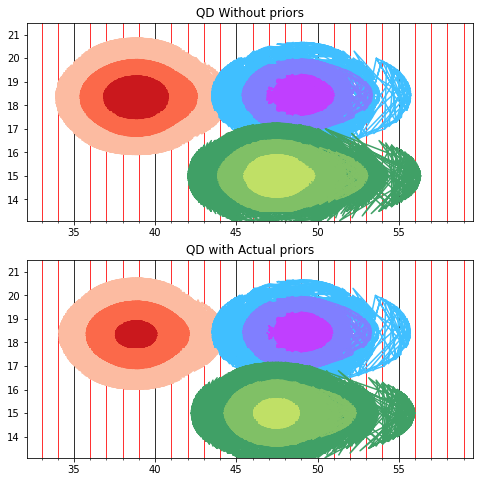

In [ ]:
def Cov_same(category,df1,s):
    Total=df1['Species2'].count()

    df2=df1[df1.Species2==category]
    count=df2['Species2'].count()
    prior=count/Total
    print("\nPrior",category,"\n",prior)
    mean_value=df2['Culmen Length (mm)'].mean()
    df2['Culmen Length (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Culmen Depth (mm)'].mean()

    df2['Culmen Depth (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Flipper Length (mm)'].mean()

    df2['Flipper Length (mm)'].fillna(value=mean_value, inplace=True)

    X=df2['Culmen Length (mm)']
    Y=df2['Culmen Depth (mm)']
    Z=df2[['Culmen Length (mm)','Culmen Depth (mm)']]
    mu=np.mean(Z,axis=0)
    cov=np.cov(Z,rowvar=0)
    print("\nMean",category,"\n",mu)
    print("\nCovariance",category,"\n",cov)

    X, Y = np.meshgrid(X,Y)

    pos = np.empty(X.shape+(2,))
    #print(pos.shape)
    pos[:,:,0]=X

    pos[:,:,1]=Y

    rv = multivariate_normal(mu,s)
    p=rv.pdf(pos)
    # Decision Boundary
    #g = np.log(p) 

    #print("MEAN\n",mu)
    #print("COVARIANCE\n",cov)
    #fig, ax = plt.subplots()
    #ax.contour(X, Y, p,colors='black') 
    #contours=ax.contour(X, Y, p, levels=3, cmap=cm)
    #plt.clabel(contours, inline=True, fontsize=8)
    #plt.show()
    return X,Y,p,prior;
# call function
X1,Y1,p1,pr1=Cov_same("Adelie",df1,arr)
X2,Y2,p2,pr2=Cov_same("Chinstrap",df1,arr)
X3,Y3,p3,pr3=Cov_same("Gentoo",df1,arr)
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(211)
ax1.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax1.grid(axis = 'x',which='major',color='black')
ax1.grid(axis = 'x',which='minor',color="red")

contours=ax1.contour(X1, Y1, p1, levels=3, cmap="Reds")
contours=ax1.contour(X2, Y2, p2, levels=3, cmap="cool")
#ax1.contour(X1, Y1, g1-g2, [0])

contours=ax1.contour(X3, Y3, p3, levels=3, cmap="summer")
ax1.set_title("QD Without priors")
ax2 = fig.add_subplot(212)
ax2.xaxis.set_minor_locator(tck.AutoMinorLocator())

contours=ax2.contour(X1, Y1, (p1*pr1), levels=3, cmap="Reds")
contours=ax2.contour(X2, Y2, (p2*pr2), levels=3, cmap="cool")
contours=ax2.contour(X3, Y3, (p3*pr3), levels=3, cmap="summer")
ax2.set_title("QD with Actual priors")
ax2.grid(axis = 'x',which='major',color='black')
ax2.grid(axis = 'x',which='minor',color="red")
# Decision Boundary

#plt.contour(x, y, g, [0])

plt.show()

## How are the major and minor axis of ellipses with respect to X,Y axis of plot for LD plot with diagonal variances

## 33.plot 3D diatribution for LD with Diagonal Covariance Matrix


Prior Adelie 
 0.4418604651162791

Mean Adelie 
 Culmen Length (mm)    38.825144
Culmen Depth (mm)     18.338495
dtype: float64

Covariance Adelie 
 [[7.21992096 1.21985859]
 [1.21985859 1.47983161]]

Prior Chinstrap 
 0.19767441860465115

Mean Chinstrap 
 Culmen Length (mm)    48.833824
Culmen Depth (mm)     18.420588
dtype: float64

Covariance Chinstrap 
 [[11.15062994  2.4778007 ]
 [ 2.4778007   1.28912204]]

Prior Gentoo 
 0.36046511627906974

Mean Gentoo 
 Culmen Length (mm)    47.475983
Culmen Depth (mm)     14.999606
dtype: float64

Covariance Gentoo 
 [[9.52415498 1.86708774]
 [1.86708774 0.9929066 ]]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


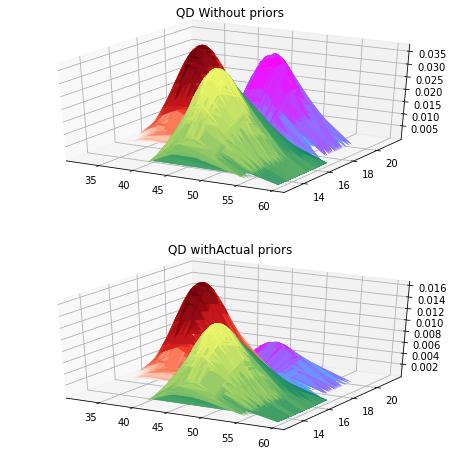

In [ ]:
def Cov_same(category,df1,s):
    Total=df1['Species2'].count()

    df2=df1[df1.Species2==category]
    count=df2['Species2'].count()
    prior=count/Total
    print("\nPrior",category,"\n",prior)
    mean_value=df2['Culmen Length (mm)'].mean()
    df2['Culmen Length (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Culmen Depth (mm)'].mean()

    df2['Culmen Depth (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Flipper Length (mm)'].mean()

    df2['Flipper Length (mm)'].fillna(value=mean_value, inplace=True)

    X=df2['Culmen Length (mm)']
    Y=df2['Culmen Depth (mm)']
    Z=df2[['Culmen Length (mm)','Culmen Depth (mm)']]
    mu=np.mean(Z,axis=0)
    cov=np.cov(Z,rowvar=0)
    print("\nMean",category,"\n",mu)
    print("\nCovariance",category,"\n",cov)

    X, Y = np.meshgrid(X,Y)

    pos = np.empty(X.shape+(2,))
    #print(pos.shape)
    pos[:,:,0]=X

    pos[:,:,1]=Y

    rv = multivariate_normal(mu,arr)
    p=rv.pdf(pos)
    # Decision Boundary
    #g = np.log(p) 

    #print("MEAN\n",mu)
    #print("COVARIANCE\n",cov)
    #fig, ax = plt.subplots()
    #ax.contour(X, Y, p,colors='black') 
    #contours=ax.contour(X, Y, p, levels=3, cmap=cm)
    #plt.clabel(contours, inline=True, fontsize=8)
    #plt.show()
    return X,Y,p,prior;
# call function
X1,Y1,p1,pr1=Cov_same("Adelie",df1,arr)
X2,Y2,p2,pr2=Cov_same("Chinstrap",df1,arr)
X3,Y3,p3,pr3=Cov_same("Gentoo",df1,arr)
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(211, projection='3d')
ax1.set_title("QD Without priors")

pdf1=ax1.plot_surface(X1, Y1, p1,cmap="Reds")
pdf2=ax1.plot_surface(X2, Y2, p2,cmap="cool")
pdf3=ax1.plot_surface(X3, Y3, p3,cmap="summer")
ax2 = fig.add_subplot(212, projection='3d')
ax2.set_title("QD withActual priors")

pdf4=ax2.plot_surface(X1, Y1, (p1*pr1),cmap="Reds")
pdf5=ax2.plot_surface(X2, Y2, (p2*pr2),cmap="cool")
pdf6=ax2.plot_surface(X3, Y3, (p3*pr3),cmap="summer")

plt.show()

## 34.What is the effect of priors on above LD plots

1.if priors are equal which $g(x_i)$ will be selected smaller or bigger?

2.if priors are not equal which $g(x_i)$ will be selected smaller or bigger?

(Hint:use Discriminant equation and answer questions)


## 35.Ld with Covariance Diagonal Matrix with same diagonal variances(off diagonals zero)

$g_i(x)=-\frac{1}{2}log|S_i|-\frac{1}{2}(x^TS^{-1}_ix-2x^TS^{-1}_im_i+{m_i}^TS^{-1}_im_i)+logP(C_i)$ 

Let all calsses have same covariance matrix with off diagonal elements=0

$S=ΣP(C_i)S_i$

S is Diagonal so:

$ S=
\begin{bmatrix}
 \sigma^2 & 0\\ 
 0 & \sigma^2\\
 \end{bmatrix}$

$|S|=\sigma^2\sigma^2$

or for multivariate distribution with d variables $|S|=\sigma^{2d}$

$ S^{-1}=
\begin{bmatrix}
 \frac{1}{\sigma^2} & 0\\ 
 0 & \frac{1}{\sigma^2}\\
 \end{bmatrix}$

we can write as

$ S^{-1}=\frac{1}{s^2}
\begin{bmatrix}
 1 & 0\\ 
 0 & 1\\
 \end{bmatrix}$

we can write also as:

 $S^{-1}=(\frac{1}{s^2})I$

The discriminant Function is:

$g_i(x)=-\frac{1}{2}log|S|-\frac{1}{2}(x^TS^{-1}x-2x^TS^{-1}m_i+{m_i}^TS^{-1}m_i)+logP(C_i)$ 



$g_i(x)=-\frac{1}{2}(x^TS^{-1}x-2x^TS^{-1}m_i+{m_i}^TS^{-1}m_i)+logP(C_i)$

$g_i(x)=-\frac{1}{2}S^{-1}(x-m_i)^2+logP(C_i)$ 

We can write as:

$g_i(x)=-\frac{1}{2}Σ^d_i\frac{(x_i-m_i)^2}{(σ^2)^2}+logP(C_i)$ 


$g_i(x)=-\frac{1}{2}Σ^d_i\frac{(x_i-m_i)^2}{s^2}+logP(C_i)$ 

$g_i(x)=-\frac{||(x_i-m_i)^2||}{2s^2}+logP(C_i)$ 



in the above equation we used 

$||(x_i-m_i)^2||=Σ^d_i({x_i-m_i})^2$

Here Mahanoblis distance is reduced to Euclidean distance 

The distribution is shaped spherically, centered around the mean vector mi



## 36 Calculate Covariance Diagonal matrix with equal variances

In [ ]:
def get_cov_pr(category,df1):
    Total=df1['Species2'].count()

    df2=df1[df1.Species2==category]
    count=df2['Species2'].count()
    prior=count/Total
    print("\nPrior",category,"\n",prior)
    mean_value=df2['Culmen Length (mm)'].mean()
    df2['Culmen Length (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Culmen Depth (mm)'].mean()

    df2['Culmen Depth (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Flipper Length (mm)'].mean()

    df2['Flipper Length (mm)'].fillna(value=mean_value, inplace=True)

    X=df2['Culmen Length (mm)']
    Y=df2['Culmen Depth (mm)']
    Z=df2[['Culmen Length (mm)','Culmen Depth (mm)']]
    mu=np.mean(Z,axis=0)
    cov=np.var(Z)
    print("\nMean",category,"\n",mu)
    print("\nCovariance",category,"\n",cov)

    # X, Y = np.meshgrid(X,Y)

    # pos = np.empty(X.shape+(2,))
    # #print(pos.shape)
    # pos[:,:,0]=X

    # pos[:,:,1]=Y

    # rv = multivariate_normal(mu,cov)
    # p=rv.pdf(pos)
    
    return cov,prior;
cov1,pr1=get_cov_pr("Adelie",df1)
cov2,pr2=get_cov_pr("Chinstrap",df1)
cov3,pr3=get_cov_pr("Gentoo",df1)
s=(cov1*pr1)+(cov1*pr1)+(cov1*pr1)
sarr=s.to_numpy(dtype ='float32')
arr = np.array([[sarr[0], 0], [0, sarr[0]]])

print("\ncommon_Covariance\n",arr)


Prior Adelie 
 0.4418604651162791

Mean Adelie 
 Culmen Length (mm)    38.825144
Culmen Depth (mm)     18.338495
dtype: float64

Covariance Adelie 
 Culmen Length (mm)    7.172421
Culmen Depth (mm)     1.470096
dtype: float64

Prior Chinstrap 
 0.19767441860465115

Mean Chinstrap 
 Culmen Length (mm)    48.833824
Culmen Depth (mm)     18.420588
dtype: float64

Covariance Chinstrap 
 Culmen Length (mm)    10.986650
Culmen Depth (mm)      1.270164
dtype: float64

Prior Gentoo 
 0.36046511627906974

Mean Gentoo 
 Culmen Length (mm)    47.475983
Culmen Depth (mm)     14.999606
dtype: float64

Covariance Gentoo 
 Culmen Length (mm)    9.447347
Culmen Depth (mm)     0.984899
dtype: float64

common_Covariance
 [[9.50762844 0.        ]
 [0.         9.50762844]]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


## 37 Contour plot For equal diagonal variances(off diagonals are zero)


Prior Adelie 
 0.4418604651162791

Mean Adelie 
 Culmen Length (mm)    38.825144
Culmen Depth (mm)     18.338495
dtype: float64

Covariance Adelie 
 [[7.21992096 1.21985859]
 [1.21985859 1.47983161]]

Prior Chinstrap 
 0.19767441860465115

Mean Chinstrap 
 Culmen Length (mm)    48.833824
Culmen Depth (mm)     18.420588
dtype: float64

Covariance Chinstrap 
 [[11.15062994  2.4778007 ]
 [ 2.4778007   1.28912204]]

Prior Gentoo 
 0.36046511627906974

Mean Gentoo 
 Culmen Length (mm)    47.475983
Culmen Depth (mm)     14.999606
dtype: float64

Covariance Gentoo 
 [[9.52415498 1.86708774]
 [1.86708774 0.9929066 ]]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


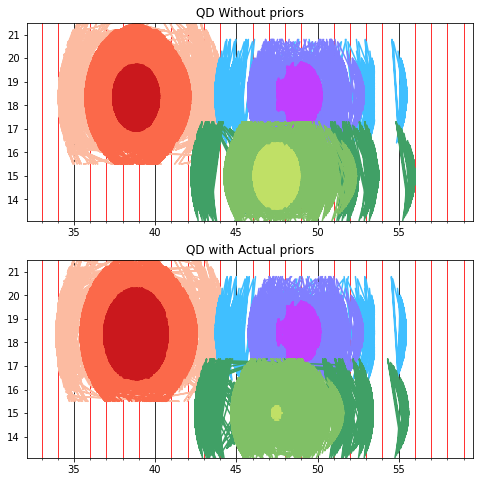

In [ ]:
def Cov_same(category,df1,s):
    Total=df1['Species2'].count()

    df2=df1[df1.Species2==category]
    count=df2['Species2'].count()
    prior=count/Total
    print("\nPrior",category,"\n",prior)
    mean_value=df2['Culmen Length (mm)'].mean()
    df2['Culmen Length (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Culmen Depth (mm)'].mean()

    df2['Culmen Depth (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Flipper Length (mm)'].mean()

    df2['Flipper Length (mm)'].fillna(value=mean_value, inplace=True)

    X=df2['Culmen Length (mm)']
    Y=df2['Culmen Depth (mm)']
    Z=df2[['Culmen Length (mm)','Culmen Depth (mm)']]
    mu=np.mean(Z,axis=0)
    cov=np.cov(Z,rowvar=0)
    print("\nMean",category,"\n",mu)
    print("\nCovariance",category,"\n",cov)

    X, Y = np.meshgrid(X,Y)

    pos = np.empty(X.shape+(2,))
    #print(pos.shape)
    pos[:,:,0]=X

    pos[:,:,1]=Y

    rv = multivariate_normal(mu,s)
    p=rv.pdf(pos)
    # Decision Boundary
    #g = np.log(p) 

    #print("MEAN\n",mu)
    #print("COVARIANCE\n",cov)
    #fig, ax = plt.subplots()
    #ax.contour(X, Y, p,colors='black') 
    #contours=ax.contour(X, Y, p, levels=3, cmap=cm)
    #plt.clabel(contours, inline=True, fontsize=8)
    #plt.show()
    return X,Y,p,prior;
# call function
X1,Y1,p1,pr1=Cov_same("Adelie",df1,arr)
X2,Y2,p2,pr2=Cov_same("Chinstrap",df1,arr)
X3,Y3,p3,pr3=Cov_same("Gentoo",df1,arr)
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(211)
ax1.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax1.grid(axis = 'x',which='major',color='black')
ax1.grid(axis = 'x',which='minor',color="red")

contours=ax1.contour(X1, Y1, p1, levels=3, cmap="Reds")
contours=ax1.contour(X2, Y2, p2, levels=3, cmap="cool")
#ax1.contour(X1, Y1, g1-g2, [0])

contours=ax1.contour(X3, Y3, p3, levels=3, cmap="summer")
ax1.set_title("QD Without priors")
ax2 = fig.add_subplot(212)
ax2.xaxis.set_minor_locator(tck.AutoMinorLocator())

contours=ax2.contour(X1, Y1, (p1*pr1), levels=3, cmap="Reds")
contours=ax2.contour(X2, Y2, (p2*pr2), levels=3, cmap="cool")
contours=ax2.contour(X3, Y3, (p3*pr3), levels=3, cmap="summer")
ax2.set_title("QD with Actual priors")
ax2.grid(axis = 'x',which='major',color='black')
ax2.grid(axis = 'x',which='minor',color="red")
# Decision Boundary

#plt.contour(x, y, g, [0])

plt.show()

## Comment on the center of each class contour and the class mean

## 38 Plot 3D distributions for Discriminent functions with equal diagonal variances(off diagonals are zero)


Prior Adelie 
 0.4418604651162791

Mean Adelie 
 Culmen Length (mm)    38.825144
Culmen Depth (mm)     18.338495
dtype: float64

Covariance Adelie 
 Culmen Length (mm)    7.172421
Culmen Depth (mm)     1.470096
dtype: float64

Prior Chinstrap 
 0.19767441860465115

Mean Chinstrap 
 Culmen Length (mm)    48.833824
Culmen Depth (mm)     18.420588
dtype: float64

Covariance Chinstrap 
 Culmen Length (mm)    10.986650
Culmen Depth (mm)      1.270164
dtype: float64

Prior Gentoo 
 0.36046511627906974

Mean Gentoo 
 Culmen Length (mm)    47.475983
Culmen Depth (mm)     14.999606
dtype: float64

Covariance Gentoo 
 Culmen Length (mm)    9.447347
Culmen Depth (mm)     0.984899
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


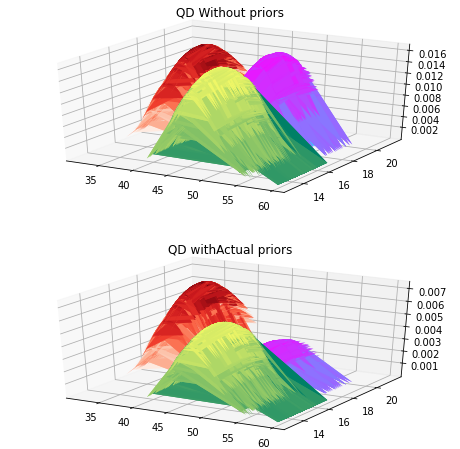

In [ ]:
def Cov_same(category,df1,s):
    Total=df1['Species2'].count()

    df2=df1[df1.Species2==category]
    count=df2['Species2'].count()
    prior=count/Total
    print("\nPrior",category,"\n",prior)
    mean_value=df2['Culmen Length (mm)'].mean()
    df2['Culmen Length (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Culmen Depth (mm)'].mean()

    df2['Culmen Depth (mm)'].fillna(value=mean_value, inplace=True)
    mean_value=df2['Flipper Length (mm)'].mean()

    df2['Flipper Length (mm)'].fillna(value=mean_value, inplace=True)

    X=df2['Culmen Length (mm)']
    Y=df2['Culmen Depth (mm)']
    Z=df2[['Culmen Length (mm)','Culmen Depth (mm)']]
    mu=np.mean(Z,axis=0)
    cov=np.var(Z)
    print("\nMean",category,"\n",mu)
    print("\nCovariance",category,"\n",cov)

    X, Y = np.meshgrid(X,Y)

    pos = np.empty(X.shape+(2,))
    #print(pos.shape)
    pos[:,:,0]=X

    pos[:,:,1]=Y

    rv = multivariate_normal(mu,s)
    p=rv.pdf(pos)
    # Decision Boundary
    #g = np.log(p) 

    #print("MEAN\n",mu)
    #print("COVARIANCE\n",cov)
    #fig, ax = plt.subplots()
    #ax.contour(X, Y, p,colors='black') 
    #contours=ax.contour(X, Y, p, levels=3, cmap=cm)
    #plt.clabel(contours, inline=True, fontsize=8)
    #plt.show()
    return X,Y,p,prior;
# call function
X1,Y1,p1,pr1=Cov_same("Adelie",df1,arr)
X2,Y2,p2,pr2=Cov_same("Chinstrap",df1,arr)
X3,Y3,p3,pr3=Cov_same("Gentoo",df1,arr)
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(211, projection='3d')
ax1.set_title("QD Without priors")

pdf1=ax1.plot_surface(X1, Y1, p1,cmap="Reds")
pdf2=ax1.plot_surface(X2, Y2, p2,cmap="cool")
pdf3=ax1.plot_surface(X3, Y3, p3,cmap="summer")
ax2 = fig.add_subplot(212, projection='3d')
ax2.set_title("QD withActual priors")

pdf4=ax2.plot_surface(X1, Y1, (p1*pr1),cmap="Reds")
pdf5=ax2.plot_surface(X2, Y2, (p2*pr2),cmap="cool")
pdf6=ax2.plot_surface(X3, Y3, (p3*pr3),cmap="summer")

plt.show()

## 39.What is the effect of priors on above LD plots

1.if priors are equal which $g(x_i)$ will be selected smaller or bigger?

2.if priors are not equal which $g(x_i)$ will be selected smaller or bigger?

(Hint:use LD equation and answer questions)





## 40.Nearest mean classifier (template matching procedure)

This classifier has LD  with: 

1)Covariance Matrix diagonals are equal

2)Covariance off diagonals are zero

3)Priors are equal


$g_i(x)=-\frac{1}{2}log|S_i|-\frac{1}{2}(x^TS^{-1}_ix-2x^TS^{-1}_im_i+{m_i}^TS^{-1}_im_i)+logP(C_i)$ 

Let all calsses have same covariance matrix with off diagonal elements=0

$S=ΣP(C_i)S_i$

S is Diagonal so:

$ S=
\begin{bmatrix}
 \sigma^2 & 0\\ 
 0 & \sigma^2\\
 \end{bmatrix}$

$|S|=\sigma^2\sigma^2$

or for multivariate distribution with d variables $|S|=\sigma^{2d}$

$ S^{-1}=
\begin{bmatrix}
 \frac{1}{\sigma^2} & 0\\ 
 0 & \frac{1}{\sigma^2}\\
 \end{bmatrix}$

we can write as

$ S^{-1}=\frac{1}{s^2}
\begin{bmatrix}
 1 & 0\\ 
 0 & 1\\
 \end{bmatrix}$

we can write also as:

 $S^{-1}=(\frac{1}{s^2})I$

The discriminant Function is:

$g_i(x)=-\frac{1}{2}log|S|-\frac{1}{2}(x^TS^{-1}x-2x^TS^{-1}m_i+{m_i}^TS^{-1}m_i)+logP(C_i)$ 



$g_i(x)=-\frac{1}{2}(x^TS^{-1}x-2x^TS^{-1}m_i+{m_i}^TS^{-1}m_i)+logP(C_i)$

$g_i(x)=-\frac{1}{2}S^{-1}(x-m_i)^2+logP(C_i)$ 

We can write as:

$g_i(x)=-\frac{1}{2}Σ^d_i\frac{(x_i-m_i)^2}{(σ^2)^2}+logP(C_i)$ 


$g_i(x)=-\frac{1}{2}Σ^d_i\frac{(x_i-m_i)^2}{s^2}+logP(C_i)$ 

$g_i(x)=-\frac{||(x_i-m_i)^2||}{2s^2}+logP(C_i)$ 



in the above equation we used 

$||(x_i-m_i)^2||=Σ^d_i({x_i-m_i})^2$

If priors are equal then 

$g_i(x)=-\frac{||(x_i-m_i)^2||}{2s^2} ≡||(x_i-m_i)^2||$ 

This is called nearest Mean classifier equation

$g_i(x)=-\frac{||(x_i-m_i)^2||}{2s^2} = (x_i-m_i)^T(x_i-m_i)$ 


$g_i(x)= -(x^Tx-2m^T_ix+m^Tm)$ 

since first term is common to all classes

$g_i(x)= 2m^T_ix-m^Tm$ 

$g_i(x)= W^T_ix+w_{i0}$

where

$W_i=m_i$

$w_{i0}=-\frac{1}{2}||m_i||^2$


when all $m_i$ norms are equal or comparable

$g_i(x)= W^T_ix$

this means LD is simply dot product of matrices $W^T_i and x$

**We can actually think of finding the best discriminant function as the
task of finding the best distance function. This can be seen as another
approach to classification, Instead of learning the discriminant functions***

$D(x_1,x_2)<D(x_1,x_3)$







## 41.Understand norms in machine learning

what is L1 norm?

what is L2 norm?

what is manhattan distance?

what is Euclidean diatance?

https://towardsdatascience.com/why-norms-matters-machine-learning-3f08120af429

## 42 Summary( Reducing variance through simplifying assumptions)

Covariance & Contours         | Covariance matrix            | No. of parameters 
------------------------------|------------------------------|------------------
Shared, Hyperspheric          | $S_i=S=s^2I$                 | 1 
Shared, Axis aligned          | $S_i=S$ and $ s_{ij}=0$      | d 
Shared, Hyperellipsoidal      | $S_i=S$                      | $d(d+1)/2$ 
Different, Hyperellipsoidal   | $S_i$                        | $k.d(d+1)/2$ 
 


## 5.6 Regularised Discriminant Analysis(Tuning Complexity)

1) Variance decrease if Covariance matrix is shared across all classes but bias increases

2)Shared Covariance matrix can be used if samples are few (Linear discriminant analysis can be used) 

3)Euclidean distance can be used in LD if Variables are independent and have same variance

4) If Variables are dependent and have different variances to use Euclidean distance the variables are to be Z-normalised 

5)If we donot have data to calculate Dependency of variables we can use naive bayes classifier(off diagonals of covariance=0)


## 5.6 Regularised Discriminant Analysis(Tuning Complexity)

Equation for Regularised Discriminant Analysis

$S=\alpha \sigma^2I+\beta S+(1-\alpha-\beta)S_i$

**Case I:**

$\alpha=\beta=0$ we get **Quadratic Discriminant classifier**

**Case II:**

$\alpha=0$   $\beta=1$ we get **Linear Discriminant classifier**

**Case III:**

$\alpha=1$  $\beta=0$ we get **Nearest Mean classifier**

**Case IV:**

$\alpha$ $\beta$  are different  we get **Different  classifier**


**Case V:**

Small dataset Bayesian estimate

**Case VI:**

Best of the QDA,LDA(same Cov),LDA(Diagonal Cov),LDA(Diagonal Cov with same elements)
